Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Counts for facility_name category:
facility_name
Subway Sandwiches & Salads                          11
McDonald's                                           9
Italian Village Pizza                                6
Fellini's Pizzeria                                   5
Caliente Pizza & Draft House                         5
                                                    ..
Dormition of the Theotokos Greek Orthodox Church     1
Hunan Bar                                            1
Bellisario's Pizza Palace                            1
Acmetonia Primary School Cafeteria                   1
Lin's Garden                                         1
Name: count, Length: 190, dtype: int64

Counts for description_x category:
description_x
Chain Restaurant without Liquor       78
Restaurant with Liquor                45
Restaurant without Liquor             42
Chain

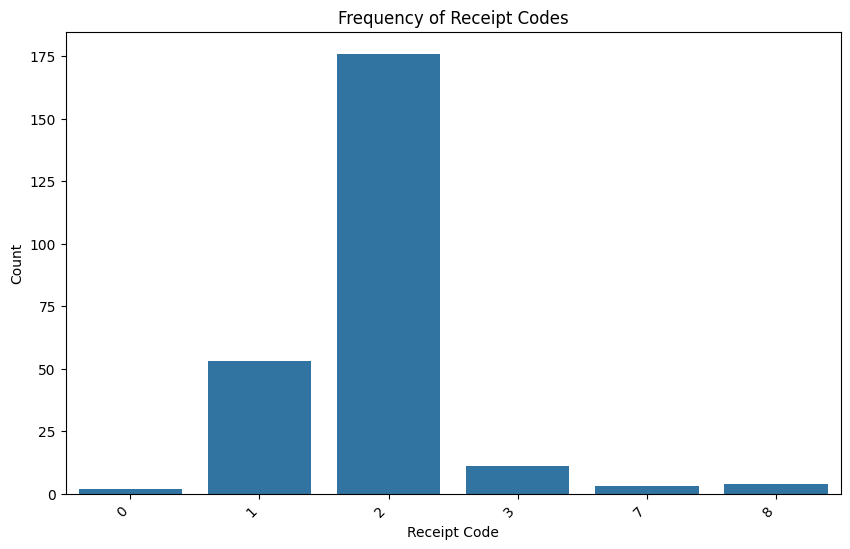

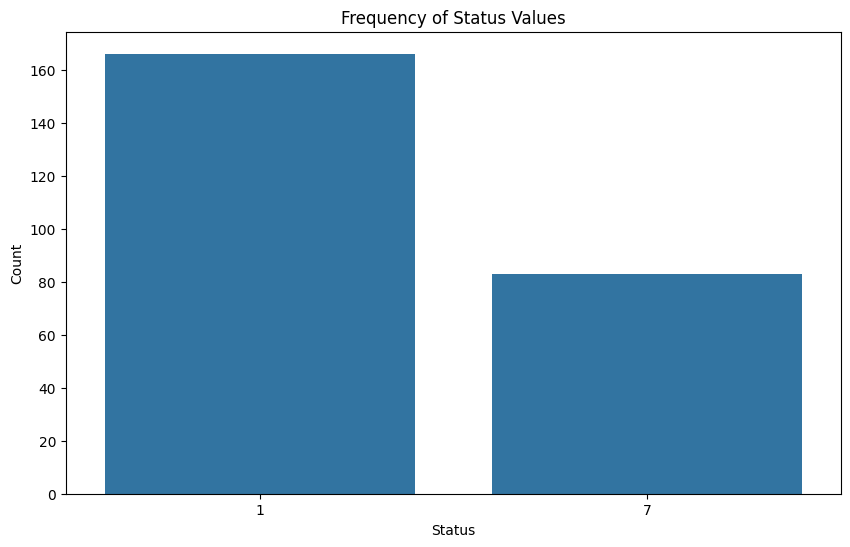

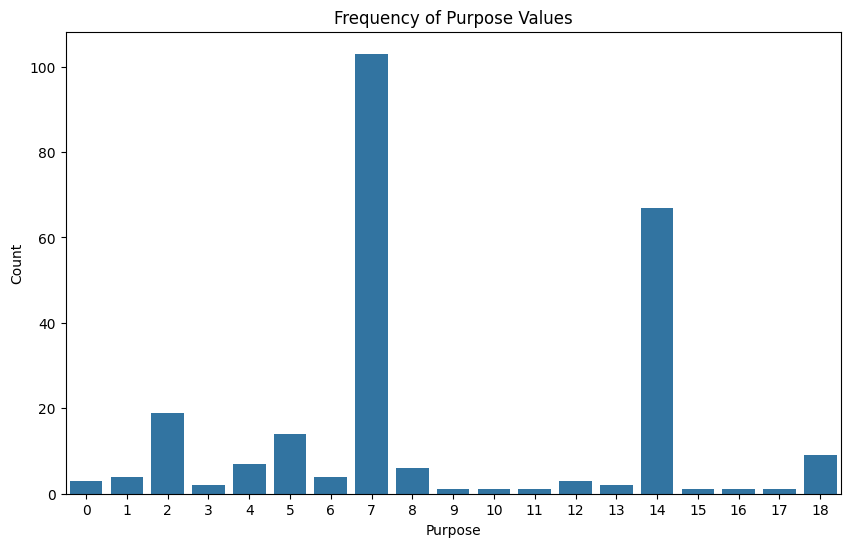

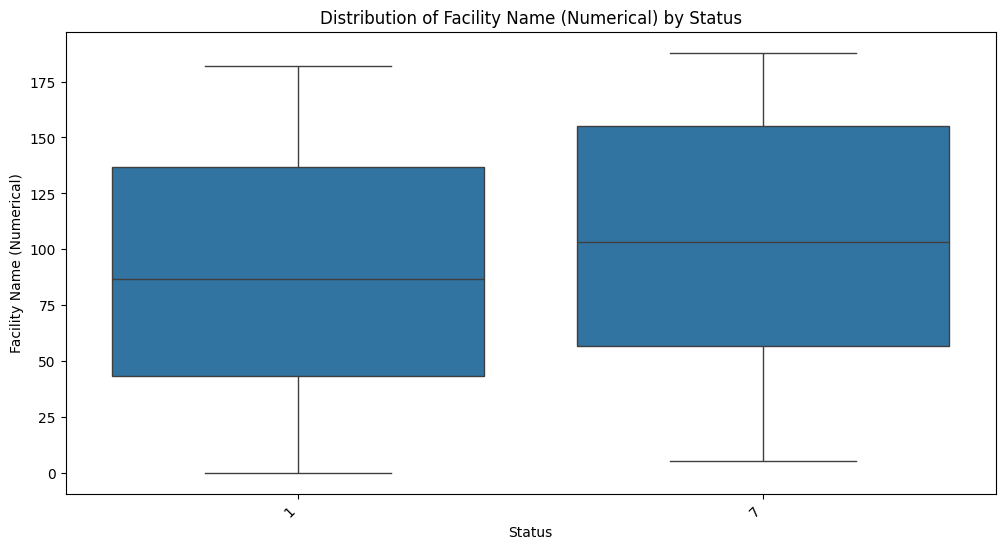

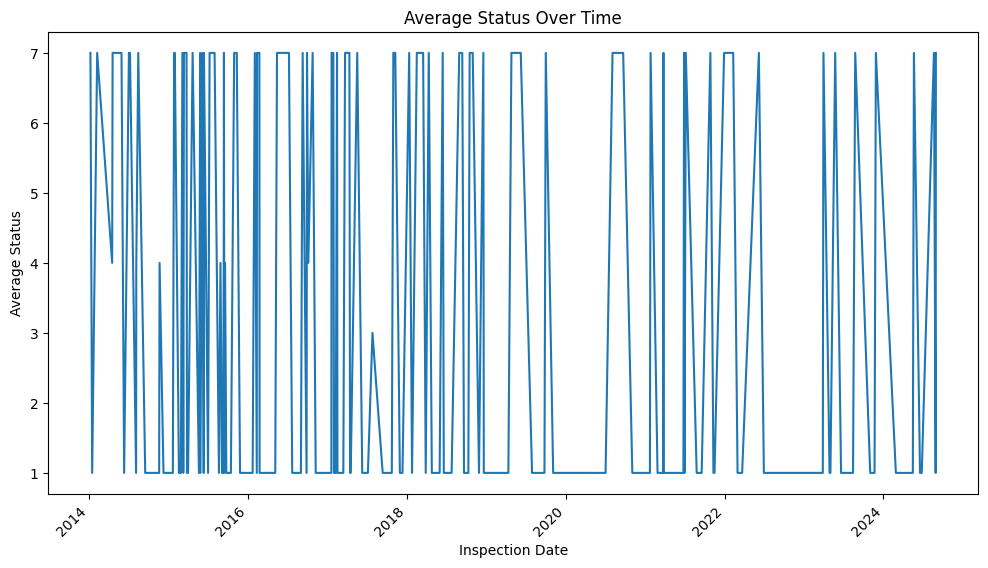

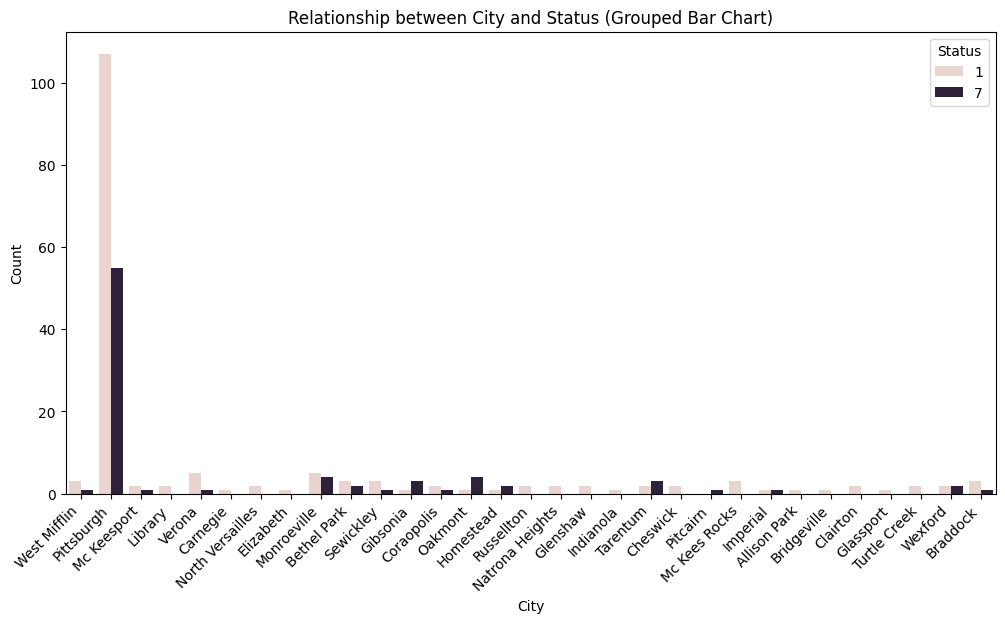

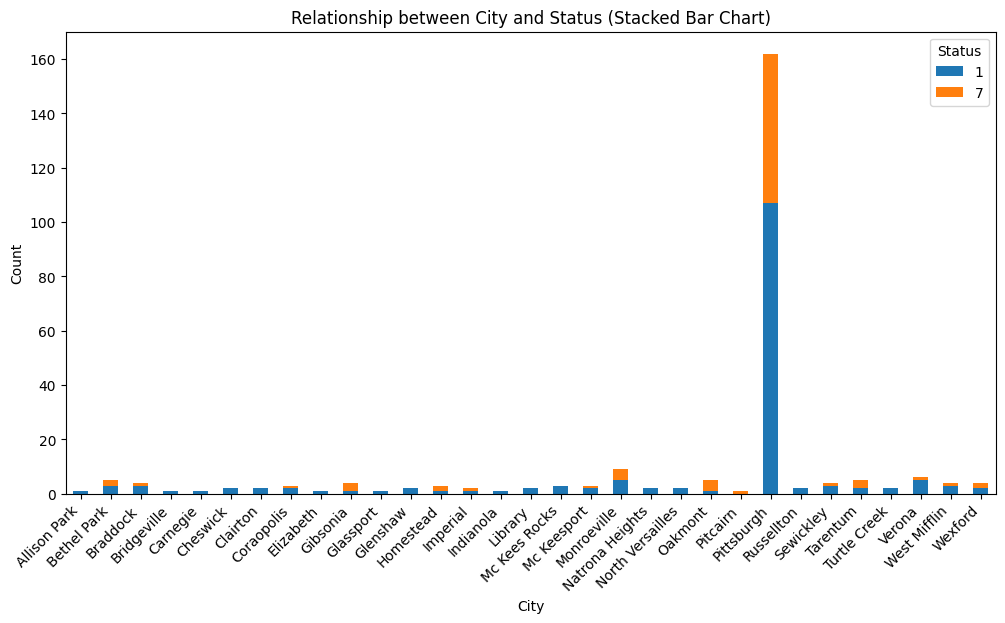

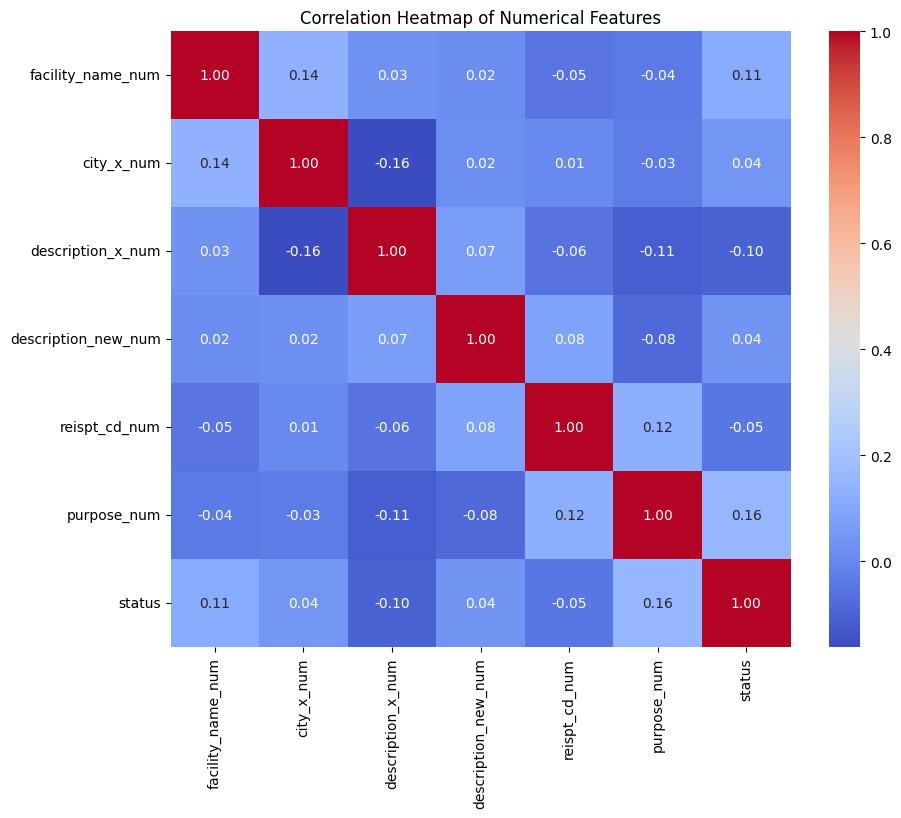

Accuracy: 0.74
Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best score: 0.6232051282051282
Accuracy on testing set: 0.74
Accuracy: 0.74
Precision: 0.8075999999999999
Recall: 0.74
F1 Score: 0.6294252873563217
Mean Squared Error: 9.36
Root Mean Squared Error: 3.059411708155671
                            OLS Regression Results                            
Dep. Variable:                 status   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.324
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.248
Time:                        22:35:44   Log-Likelihood:                -487.80
No. Observations:                 199   AIC:                             989.6
Df Residuals:                     192   BIC:                             1013.
Df Model:                           6                                         
Covariance Ty

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/Data Science Fundamentals/Restaurants Inspection Descriptions.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data Science Fundamentals/Status of Restaurants Post-Inspection.csv')
merged_df = pd.merge(df1, df2, on='facility_name')
merged_df.head()
merged_df.describe()

df3 = merged_df.copy()
df3.drop(['url', 'bus_st_date_x', 'bus_st_date_y', 'rating', 'num_x', 'num_y', 'end_time_x', 'end_time_y', '_id_x', 'encounter_x', 'placard_st_x', 'street_x', 'state_x', 'zip_x', 'start_time_x', 'start_time_y', 'municipal_x', '_id_y', 'encounter_y', 'placard_st_y'], axis=1, inplace=True)
df3.drop(['street_y', 'city_y', 'state_y', 'zip_y', 'municipal_y', 'placard_desc', 'inspect_dt_y', 'ispt_purpose', 'category_cd', 'abrv', 'id_x', 'id_y', 'reispt_dt'], axis=1, inplace=True)


sampled_df = df3.sample(n=250, random_state=42)

for column in sampled_df.select_dtypes(include=['object', 'category']).columns:
    print(f"Counts for {column} category:")
    print(sampled_df[column].value_counts())
    print()
print(sampled_df.shape)
print("\n",sampled_df.isnull().sum())
missing_percentage = (sampled_df.isnull().sum() / len(sampled_df) * 100).round(2)
print('\n',missing_percentage.astype(str) + "%")

threshold = 0.5
sampled_df = sampled_df.dropna(subset=missing_percentage[missing_percentage <= threshold].index)

sampled_df['low'] = sampled_df['low'].fillna(sampled_df['low'].mode()[0])
sampled_df['medium'] = sampled_df['medium'].fillna(sampled_df['medium'].mode()[0])
sampled_df['high'] = sampled_df['high'].fillna(sampled_df['high'].mode()[0])
print("\n",sampled_df.isnull().sum())

sampled_df = sampled_df.drop_duplicates()
print(sampled_df.columns)
sampled_df.head()


status_df = sampled_df.copy()
status_df = status_df[['facility_name', 'city_x', 'inspect_dt_x', 'description_x', 'description_new', 'purpose', 'reispt_cd', 'status']]
status_df['status'] = status_df['status'].astype('int')
status_df.head()

mask = status_df['status'] == 9
status_df = status_df[~mask]

numerical_summary = status_df.describe()
print(numerical_summary)

facility_name_counts = status_df['facility_name'].value_counts()
print(facility_name_counts)

status_value_counts = status_df['status'].value_counts()
print(status_value_counts)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(status_df['purpose'])
status_df['purpose_num'] = le.transform(status_df['purpose'])


plt.figure(figsize=(10, 6))
sns.countplot(x='reispt_cd', data=status_df)
plt.title('Frequency of Receipt Codes')
plt.xlabel('Receipt Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=status_df)
plt.title('Frequency of Status Values')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='purpose_num', data=status_df)
plt.title('Frequency of Purpose Values')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

le = LabelEncoder()
le.fit(status_df['facility_name'])
status_df['facility_name_num'] = le.transform(status_df['facility_name'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='facility_name_num', data=status_df)
plt.title('Distribution of Facility Name (Numerical) by Status')
plt.xlabel('Status')
plt.ylabel('Facility Name (Numerical)')
plt.xticks(rotation=45, ha='right')
plt.show()

status_df['inspect_dt_x'] = pd.to_datetime(status_df['inspect_dt_x'])
status_by_date = status_df.groupby('inspect_dt_x')['status'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='inspect_dt_x', y='status', data=status_by_date)
plt.title('Average Status Over Time')
plt.xlabel('Inspection Date')
plt.ylabel('Average Status')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='city_x', hue='status', data=status_df)
plt.title('Relationship between City and Status (Grouped Bar Chart)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.show()

city_status_table = pd.crosstab(status_df['city_x'], status_df['status'])
city_status_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship between City and Status (Stacked Bar Chart)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.show()

le = LabelEncoder()
le.fit(status_df['description_x'])
status_df['description_x_num'] = le.transform(status_df['description_x'])

le = LabelEncoder()
le.fit(status_df['description_new'])
status_df['description_new_num'] = le.transform(status_df['description_new'])

le = LabelEncoder()
le.fit(status_df['reispt_cd'])
status_df['reispt_cd_num'] = le.transform(status_df['reispt_cd'])

le = LabelEncoder()
le.fit(status_df['city_x'])
status_df['city_x_num'] = le.transform(status_df['city_x'])

le = LabelEncoder()
le.fit(status_df['inspect_dt_x'])
status_df['inspect_dt_x_num'] = le.transform(status_df['inspect_dt_x'])

numerical_features = ['facility_name_num', 'city_x_num', 'description_x_num', 'description_new_num', 'reispt_cd_num', 'purpose_num', 'status']
numerical_df = status_df[numerical_features]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['facility_name_num', 'city_x_num', 'description_x_num', 'description_new_num', 'reispt_cd_num', 'purpose_num']
target = 'status'

X = status_df[features]
y = status_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')

model = LogisticRegression(penalty='l1', solver='liblinear')

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set:", accuracy)

y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

import statsmodels.api as sm
X_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_const).fit()
print(model.summary())

from sklearn.linear_model import LinearRegression
multiple_LM = LinearRegression()

multiple_LM.fit(X_train, y_train)

print(np.round(multiple_LM.coef_, 2), round(multiple_LM.intercept_,2))

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

y_pred = multiple_LM.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)

print("The model performance metrics:")
print('------------------------------')
print("RMSE is {}".format(round(rmse,2)))
print("R-Squared score is {}".format(round(r2,2)))

X_with_const_MLR = sm.add_constant(X_train)
model_MLR = sm.OLS(y_train, X_with_const_MLR).fit()
print(model_MLR.summary())